# Algorithms for Massive Data 
## Project 4: Face/comic recognizer with deep learning

### _Andrea Pio Cutrera_ - 965591 - _Data Science and Economics_ - _Università degli Studi di Milano_
# Part 2 - Data Preprocessing, Model definition, training and evaluation

Project for the module **_Algoritms for Massive Data_** of the course _Algoritms for Massive Data, Cloud and Distributed Computing_ for the academic year **2021-2022**.
The task is to implement a deep-learning-based system discriminating between real faces and comics, using the «Comics faces» dataset.
The «Comic faces» dataset is published on Kaggle and released under the CC-BY 4.0 license, with attribution required. 

- Dataset link: https://www.kaggle.com/defileroff/comic-faces-paired-synthetic-v2

### If you do not have one of these library please install them before going afterwards

In [ ]:
# if you do not have pip, the python package installer, install or upgrade it
# -------> pip install --upgrade pip
# -------> pip install numpy
# -------> pip install os
# -------> pip install datetime
# -------> pip install opencv-python
# -------> pip install random
# -------> pip install -U scikit-learn
# -------> pip install tensorflow

In [1]:
# we start importing the basic libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime

# We use a Python Library called OpenCV: <https://docs.opencv.org/4.x/d1/dfb/intro.html>
# OpenCV (Open Source Computer Vision Library: http://opencv.org) is an open-source library that includes 
# several hundreds of computer vision algorithms for image operations.
import cv2


import random
from sklearn.model_selection import train_test_split

# tensorflow is the library used for deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# show the files in current directory 
!ls

archive                             face2comics_v2.0.0_by_Sxela
comic-faces-paired-synthetic-v2.zip preprocessing_data.ipynb
deep-learning-tutorial.ipynb        project-initial-notes.ipynb
download_data.ipynb                 samples


In [2]:
working_directory = !pwd                 # get present working directory
working_directory = working_directory[0] # get the full string 
working_directory

'/Users/andreacutrera/Desktop/Andrea_Pio_Cutrera_project_amd'

In [3]:
DIR = working_directory + "/face2comics_v2.0.0_by_Sxela/face2comics_v2.0.0_by_Sxela" # go inside the 2 folders
CATEGORIES = ["comics", "faces"] # set the names of the subsequent folders, which would correspond to the 
                                 # labels of the class of our images - Comics and Faces.

In [4]:
path_faces = os.path.join(DIR, CATEGORIES[1])   # path to the faces folder
path_comics = os.path.join(DIR, CATEGORIES[0])  # path to the comics folder

# just to show the path to the 2 folders in which we have the images, without the part before
print(path_faces[-62:])
print(path_comics[-63:])

/face2comics_v2.0.0_by_Sxela/face2comics_v2.0.0_by_Sxela/faces
/face2comics_v2.0.0_by_Sxela/face2comics_v2.0.0_by_Sxela/comics


In [5]:
# just show the first 5 images in the folder of real faces
os.listdir(path_faces)[:5]

['9733.jpg', '63.jpg', '6400.jpg', '823.jpg', '4217.jpg']

In [6]:
# just show the first 5 images in the folder of comics faces
os.listdir(path_comics)[:5]

['9733.jpg', '63.jpg', '6400.jpg', '823.jpg', '4217.jpg']

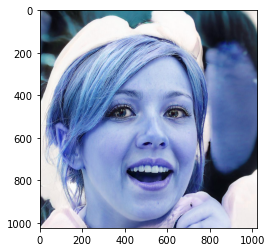

In [7]:
# Just show one image of a real face - the 100-th one in the folder
image_array = cv2.imread(os.path.join(path_faces, os.listdir(path_faces)[100]))
plt.imshow(image_array)
plt.show()

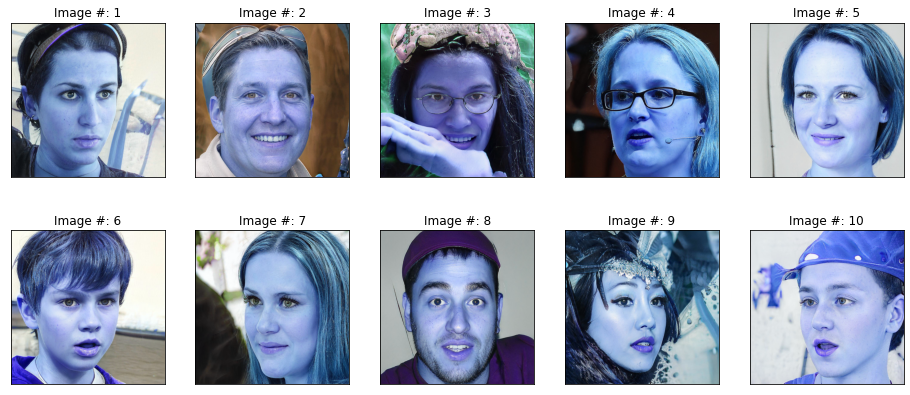

In [17]:
# plot the first 10 images
plt.figure(figsize=(16,7))
for image_number in range(0,10):
    plt.subplot(2,5,image_number+1)
    image_array = cv2.imread(os.path.join(path_faces, os.listdir(path_faces)[image_number]))
    plt.imshow(image_array)
    plt.xticks([])
    plt.yticks([])
    plt.title("Image #: " + str(image_number+1))

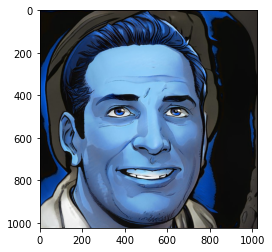

In [18]:
# Just show one image of a comics' face - the 1-st one in the folder
image_array = cv2.imread(os.path.join(path_comics, os.listdir(path_comics)[1]))
plt.imshow(image_array)
plt.show()

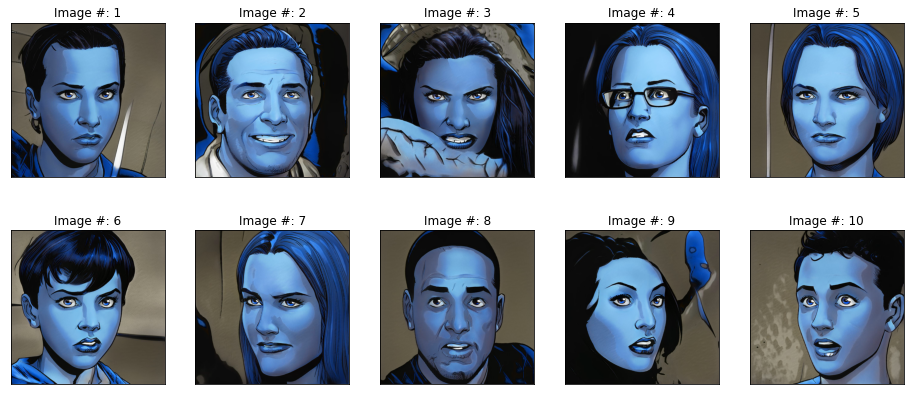

In [19]:
# plot the first 10 images
plt.figure(figsize=(16,7))
for image_number in range(0,10):
    plt.subplot(2,5,image_number+1)
    image_array = cv2.imread(os.path.join(path_comics, os.listdir(path_comics)[image_number]))
    plt.imshow(image_array)
    plt.xticks([])
    plt.yticks([])
    plt.title("Image #: " + str(image_number+1))

In [20]:
image_array

array([[[116, 110,  99],
        [113, 107,  96],
        [107, 101,  90],
        ...,
        [ 91,  82,  79],
        [101,  92,  89],
        [109, 100,  97]],

       [[105,  99,  88],
        [103,  97,  86],
        [ 99,  93,  82],
        ...,
        [ 82,  73,  70],
        [ 90,  81,  78],
        [ 98,  89,  86]],

       [[ 95,  89,  78],
        [ 93,  87,  76],
        [ 91,  85,  74],
        ...,
        [ 80,  71,  68],
        [ 86,  77,  74],
        [ 92,  83,  80]],

       ...,

       [[107,  98,  88],
        [102,  93,  83],
        [ 99,  90,  80],
        ...,
        [ 98,  88,  81],
        [100,  90,  83],
        [103,  93,  86]],

       [[115, 106,  96],
        [108,  99,  89],
        [103,  94,  84],
        ...,
        [ 99,  89,  82],
        [107,  97,  90],
        [114, 104,  97]],

       [[128, 119, 109],
        [119, 110, 100],
        [112, 103,  93],
        ...,
        [107,  97,  90],
        [121, 111, 104],
        [132, 122, 115]]

In [21]:
image_array.shape

(1024, 1024, 3)

Images shapes are ```1024x1024x3 pixels```

- the third dimension with 3 layers represent the color RGB: Red, Green and Blue;

In [41]:
# Just encode the image in Grayscale with the function of CV2
# If set, always convert image to the single channel grayscale image.
cv2.IMREAD_GRAYSCALE

0

In [42]:
cv2.imread(os.path.join(path_comics, os.listdir(path_comics)[10]), 0).shape

(1024, 1024)

In [43]:
# reduces the dimension to 1/2
cv2.IMREAD_REDUCED_GRAYSCALE_2

16

In [44]:
cv2.imread(os.path.join(path_comics, os.listdir(path_comics)[10]), 16).shape

(512, 512)

In [45]:
# reduces the dimension to 1/4
cv2.IMREAD_REDUCED_GRAYSCALE_4

32

In [46]:
cv2.imread(os.path.join(path_comics, os.listdir(path_comics)[10]), 32).shape

(256, 256)

In [47]:
# reduces the dimension to 1/8
cv2.IMREAD_REDUCED_GRAYSCALE_8

64

In [48]:
cv2.imread(os.path.join(path_comics, os.listdir(path_comics)[10]), 64).shape

(128, 128)

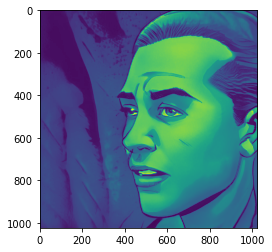

In [57]:
# Now try to see an image in IMREAD_GRAYSCALE to one channel of color, while maintaining the size of pixels
image_array = cv2.imread(os.path.join(path_comics, os.listdir(path_comics)[10]), 0)
plt.imshow(image_array)
plt.show()

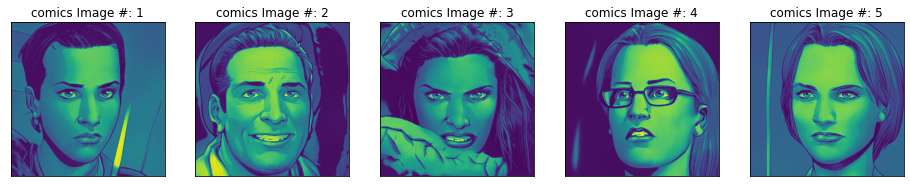

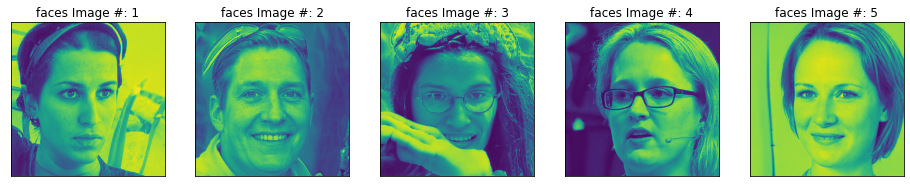

In [58]:
# plot the first 5 images for both the categories
for class_label in CATEGORIES:
    plt.figure(figsize=(16,7))
    for image_number in range(0,5):
        plt.subplot(1,5,image_number+1)
        image_array = cv2.imread(os.path.join(os.path.join(DIR, class_label), os.listdir(os.path.join(DIR, class_label))[image_number]), 0)
        plt.imshow(image_array)
        plt.xticks([])
        plt.yticks([])
        plt.title(class_label + " Image #: " + str(image_number+1))

In [59]:
# now data has a different dimensionality --> just 1024x1024 pixels
image_array, image_array.shape

(array([[211, 201, 194, ..., 219, 215, 211],
        [211, 201, 194, ..., 214, 211, 207],
        [210, 201, 196, ..., 212, 209, 206],
        ...,
        [222, 218, 213, ..., 214, 213, 201],
        [231, 225, 218, ..., 219, 222, 205],
        [238, 232, 223, ..., 225, 233, 215]], dtype=uint8),
 (1024, 1024))

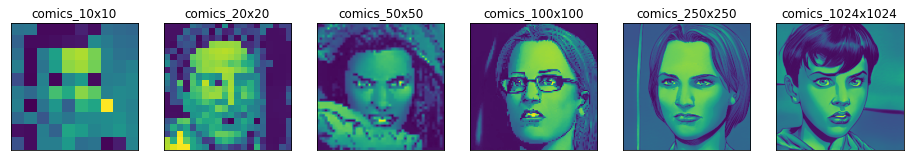

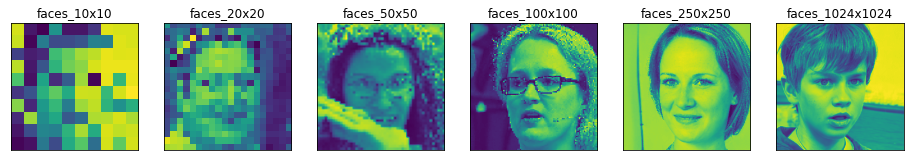

In [72]:
# plot the different sizes to understand visually how changes the definitions at human vision
sizes = [10, 20, 50, 100, 250, 1024, 2048]
for class_label in CATEGORIES:
    plt.figure(figsize=(16,7))
    for image_number in range(0,6):
        plt.subplot(1,6,image_number+1)
        image_array = cv2.imread(os.path.join(os.path.join(DIR, class_label), os.listdir(os.path.join(DIR, class_label))[image_number]), 0)
        image_array = cv2.resize(image_array, (sizes[image_number], sizes[image_number]))
        plt.imshow(image_array)
        plt.xticks([])
        plt.yticks([])
        plt.title(class_label + "_" + str(sizes[image_number]) + "x" + str(sizes[image_number]))

In [73]:
# get an index to associate a numerical encoding of our target label

print("The label associated to comics is:",CATEGORIES.index("comics"))
print("The label associated to faces is: ",CATEGORIES.index("faces"))

The label associated to comics is: 0
The label associated to faces is:  1


### Now let's get data

In [74]:
# Define the image size below before the starting - for a good quality use 100
data = []
image_size = 100

In [75]:
def get_data():
    for category in CATEGORIES:
        path = os.path.join(DIR, category)                # 2 iterations for both categories create 
                                                          # respectively 2 paths (2 folders)
        classification_label = CATEGORIES.index(category) # get the classification label as an integer 
                                                          # (is it a real face ? Yes = 1, No = 0)
        for image in os.listdir(path):
            try:
                image_array = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE) # cv2 read an image for all the images in each folder
                image_resized = cv2.resize(image_array, (image_size, image_size)) # resize the image
                data.append([image_resized, classification_label]) # append each image encoded along with its label
            except Exception as e:
                pass

In [76]:
# here we call the function above defined to get the data, and we measure the time it takes
start = datetime.datetime.now()

# call the function to get data
get_data()

# to quantify how much time it does take (~2 minutes with size = 100)
stop = datetime.datetime.now()
print(stop-start)

0:02:32.058241


In [77]:
# Now we have our training data into lists of lists - just show the first one
data[0]

[array([[ 84,  81,  82, ...,  77,  77,  74],
        [ 83,  83,  84, ...,  76,  77,  74],
        [ 84,  85,  85, ...,  78,  78,  75],
        ...,
        [ 11,  15,  11, ...,  97, 102,  99],
        [ 10,  50,  12, ..., 103,  98, 102],
        [  8,  11,  49, ..., 101,  99, 100]], dtype=uint8),
 0]

In [78]:
# the last image called
data[-1]

[array([[156, 120, 125, ...,  32, 215,  69],
        [155, 124,  97, ...,  59,  85,  48],
        [119, 110, 120, ...,  51,  77,  53],
        ...,
        [ 32,  33,  41, ...,  81,  76,  83],
        [ 36,  39, 206, ...,  82,  77,  76],
        [ 50, 163, 147, ...,  84,  78,  63]], dtype=uint8),
 1]

In [79]:
print(len(data)) # 20K images

20000


In [86]:
random.seed(42)      # set a seed to get always the same results (optional, not necessary, we have a lot of data)
random.shuffle(data) # to shuffle data inside, not to have all the comics before aand the faces after

In [87]:
# Now they have been shuffled - print the first 5 labels
for image in range(5):
    print("Index is: ", data[image][1])

Index is:  0
Index is:  0
Index is:  1
Index is:  1
Index is:  1


In [88]:
data[0], data[0][0].shape

([array([[  0,   8,   9, ...,  18,  22,  30],
         [  9,  10,  11, ...,  13,  17,  26],
         [  9,  10,  12, ...,  12,  15,  25],
         ...,
         [155, 158, 148, ...,  62,  61,  57],
         [117, 131, 111, ...,  59,  59,  58],
         [ 72,  84,  75, ...,  60,  57,  59]], dtype=uint8),
  0],
 (100, 100))

In [89]:
# initialize empty lists: one for the datapoints, one for the target labels
X = []
y = []

for pixels, label in data:
    X.append(pixels)
    y.append(label)

In [92]:
X[:2], y[:2] # the first 2 examples I saved

([array([[  0,   8,   9, ...,  18,  22,  30],
         [  9,  10,  11, ...,  13,  17,  26],
         [  9,  10,  12, ...,  12,  15,  25],
         ...,
         [155, 158, 148, ...,  62,  61,  57],
         [117, 131, 111, ...,  59,  59,  58],
         [ 72,  84,  75, ...,  60,  57,  59]], dtype=uint8),
  array([[ 39,  35,  37, ...,  48,  45,  45],
         [ 40,  39,  35, ...,  45,  43,  44],
         [ 40,  34,  32, ...,  43,  43,  41],
         ...,
         [ 96,  94,  10, ...,  88,  86,  84],
         [  9, 145, 176, ...,  87,  86,  83],
         [114, 142, 158, ...,  83,  84,  84]], dtype=uint8)],
 [0, 0])

In [93]:
X[0].shape

(100, 100)

In [94]:
# transform our lists into Numpy arrays
X = np.array(X)
y = np.array(y)

In [95]:
# now split data and lock somewhere your test data
# we are going to use only training data, and just a portion of them as validation for the hyperparameter tuning
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [96]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((15000, 100, 100), (5000, 100, 100), (15000,), (5000,))

### Setup some parameters before to start modelling, and make OneHotEncoding on target labels

In [111]:
# Model / data parameters
num_classes = 2
input_shape = x_train.shape[1:]

In [112]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [113]:
y_train

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [114]:
y_train.shape, y_test.shape

((15000, 2), (5000, 2))

So we finally got the data divided as:
- 15K training examples
- 5K testing examples

and:
- images of shape ```100x100```
- target labels with values ```OneHotEncoded```

In [97]:
x_train.nbytes / 1000000 #Mb used for all the training examples (consider 15K images times 100x100 matrix)

150.0

In [98]:
y_train.nbytes / 1000000 #Mb used for all the training labels

0.12

In [99]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [102]:
np.max(x_train[0]), np.min(x_train[0])

(1.0, 0.023529412)

In [103]:
x_train.nbytes / 1000000 #Mb ---> dimension augmented

600.0

In [109]:
y_train.nbytes / 1000000 #Mb

0.12

## Build the first very simple model
- Input layer: ```100x100 neurons```, one for each pixel, **flattened** to ```10,000 input neurons``` which receive the signals
- Output layer (Dense = fully connected): ```2 neurons```, one for each label ```faces``` or ```comics```

We use ```softmax activation function``` which gives a suitable probability distribution over the OneHotEncoded labels;
Then ```sdg``` which stands for stochastic gradient descent optimizer, and the following loss ```categorical_crossentropy```.

In [163]:
model_1 = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(image_size, image_size)),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

model_1.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# print model layers
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 10000)             0         
                                                                 
 dense_1 (Dense)             (None, 2)                 20002     
                                                                 
Total params: 20,002
Trainable params: 20,002
Non-trainable params: 0
_________________________________________________________________


### Add a wonderful visualization of neural network architecture

In [116]:
#https://github.com/ashishpatel26/Tools-to-Design-or-Visualize-Architecture-of-Neural-Network

In [117]:
BATCH_SIZE = 64
epochs = 30

model_1.compile(loss="categorical_crossentropy", 
              optimizer="sgd", metrics=["accuracy"])

history = model_1.fit(x_train, y_train, 
                    batch_size=BATCH_SIZE,
                    epochs=epochs,
                    validation_split=0.1)

Epoch 1/30
211/211 [==============================] - 1s 2ms/step - loss: 0.5486 - accuracy: 0.8574 - val_loss: 2.0212 - val_accuracy: 0.5373
Epoch 2/30
211/211 [==============================] - 0s 2ms/step - loss: 0.1321 - accuracy: 0.9522 - val_loss: 0.0918 - val_accuracy: 0.9720
Epoch 3/30
211/211 [==============================] - 0s 2ms/step - loss: 0.0790 - accuracy: 0.9753 - val_loss: 0.0699 - val_accuracy: 0.9787
Epoch 4/30
211/211 [==============================] - 0s 2ms/step - loss: 0.0641 - accuracy: 0.9820 - val_loss: 0.0608 - val_accuracy: 0.9813
Epoch 5/30
211/211 [==============================] - 0s 2ms/step - loss: 0.0558 - accuracy: 0.9850 - val_loss: 0.0553 - val_accuracy: 0.9867
Epoch 6/30
211/211 [==============================] - 0s 2ms/step - loss: 0.0500 - accuracy: 0.9867 - val_loss: 0.0544 - val_accuracy: 0.9847
Epoch 7/30
211/211 [==============================] - 0s 2ms/step - loss: 0.0436 - accuracy: 0.9887 - val_loss: 0.0534 - val_accuracy: 0.9847
Epoch 

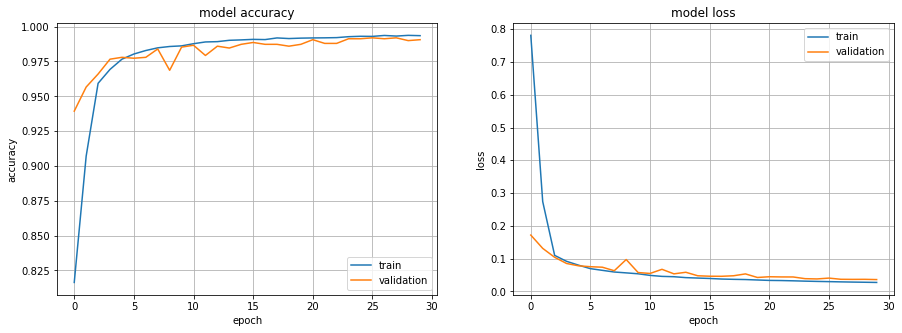

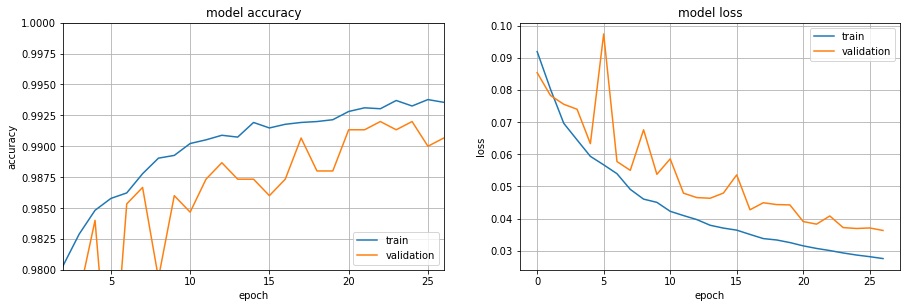

In [177]:
# summarize history for accuracy
plt.figure(1, figsize=(15, 5))
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()

# summarize history for loss
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()
plt.show()

##################################################### Why not to zoom a bit?

plt.figure(1, figsize=(15, 10))
# summarize history for accuracy
plt.subplot(221)
plt.plot(history.history['accuracy'][zoom:])
plt.plot(history.history['val_accuracy'][zoom:])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()
plt.axis([2, 26, 0.98, 1.0])

# summarize history for loss
plt.subplot(222)
plt.plot(history.history['loss'][zoom:])
plt.plot(history.history['val_loss'][zoom:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()


plt.show()

In [178]:
## Why not to zoom a bit?
#
## summarize history for accuracy
#plt.figure(1, figsize=(15, 5))
#plt.subplot(121)
#plt.plot(history.history['accuracy'][zoom:])
#plt.plot(history.history['val_accuracy'][zoom:])
#plt.title('model accuracy')
#plt.ylabel('accuracy')
#plt.xlabel('epoch')
#plt.legend(['train', 'validation'], loc='lower right')
#plt.grid()
#plt.axis([2, 26, 0.98, 1.0])
#
## summarize history for loss
#plt.subplot(122)
#plt.plot(history.history['loss'][zoom:])
#plt.plot(history.history['val_loss'][zoom:])
#plt.title('model loss')
#plt.ylabel('loss')
#plt.xlabel('epoch')
#plt.legend(['train', 'validation'], loc='upper right')
#plt.grid()
#
#plt.show()

## Now we use another optimizer
- ```adam``` optimizer: Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.

According to Kingma et al., 2014, the method is "computationally efficient, has little memory requirement, invariant to diagonal rescaling of gradients, and is well suited for problems that are large in terms of data/parameters".

[https://keras.io/api/optimizers/adam/]

In [179]:
model_2 = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(image_size, image_size)),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# print model layers
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 10000)             0         
                                                                 
 dense_6 (Dense)             (None, 2)                 20002     
                                                                 
Total params: 20,002
Trainable params: 20,002
Non-trainable params: 0
_________________________________________________________________


In [180]:
BATCH_SIZE = 128
epochs = 30

model_2.compile(loss="categorical_crossentropy", 
              optimizer="sgd", metrics=["accuracy"])

history = model_2.fit(x_train, y_train, 
                    batch_size=BATCH_SIZE,
                    epochs=epochs,
                    validation_split=0.1)

Epoch 1/30
106/106 [==============================] - 1s 4ms/step - loss: 0.8305 - accuracy: 0.8147 - val_loss: 0.1914 - val_accuracy: 0.9320
Epoch 2/30
106/106 [==============================] - 0s 3ms/step - loss: 0.3144 - accuracy: 0.9013 - val_loss: 0.1268 - val_accuracy: 0.9533
Epoch 3/30
106/106 [==============================] - 0s 3ms/step - loss: 0.1200 - accuracy: 0.9545 - val_loss: 0.1090 - val_accuracy: 0.9640
Epoch 4/30
106/106 [==============================] - 0s 2ms/step - loss: 0.0887 - accuracy: 0.9710 - val_loss: 0.0838 - val_accuracy: 0.9727
Epoch 5/30
106/106 [==============================] - 0s 3ms/step - loss: 0.0781 - accuracy: 0.9759 - val_loss: 0.0914 - val_accuracy: 0.9727
Epoch 6/30
106/106 [==============================] - 0s 3ms/step - loss: 0.0707 - accuracy: 0.9797 - val_loss: 0.0738 - val_accuracy: 0.9793
Epoch 7/30
106/106 [==============================] - 0s 2ms/step - loss: 0.0622 - accuracy: 0.9834 - val_loss: 0.0676 - val_accuracy: 0.9800
Epoch 

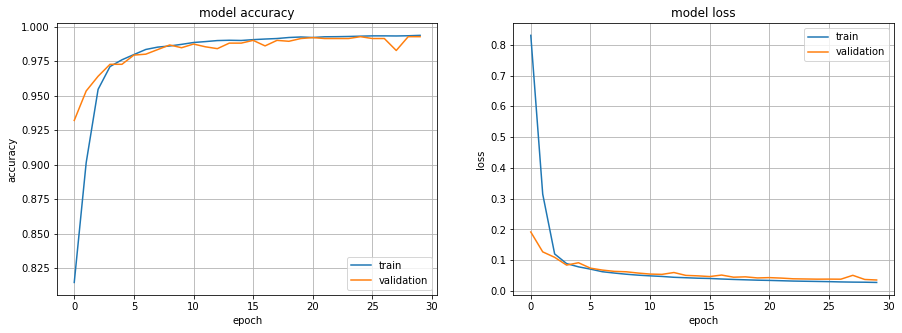

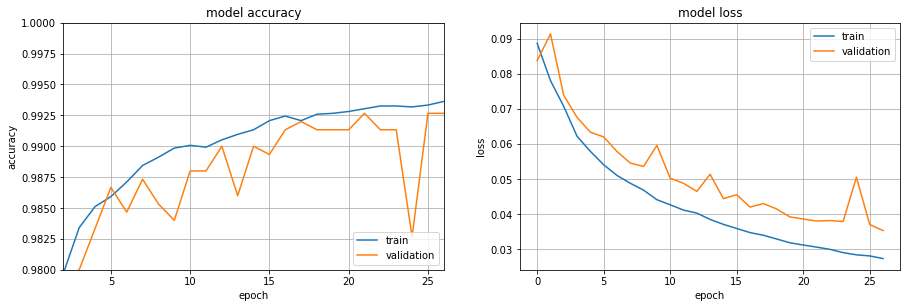

In [181]:
# summarize history for accuracy
plt.figure(1, figsize=(15, 5))
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()

# summarize history for loss
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()
plt.show()

##################################################### Why not to zoom a bit?

plt.figure(1, figsize=(15, 10))
# summarize history for accuracy
plt.subplot(221)
plt.plot(history.history['accuracy'][zoom:])
plt.plot(history.history['val_accuracy'][zoom:])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()
plt.axis([2, 26, 0.98, 1.0])

# summarize history for loss
plt.subplot(222)
plt.plot(history.history['loss'][zoom:])
plt.plot(history.history['val_loss'][zoom:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()


plt.show()

### Now we try to increase batch size

In [182]:
model_3 = tf.keras.Sequential(
  [
      tf.keras.layers.Flatten(input_shape=(image_size, image_size)),
      tf.keras.layers.Dense(num_classes, activation='softmax')
  ])

model_3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# print model layers
model_3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 10000)             0         
                                                                 
 dense_7 (Dense)             (None, 2)                 20002     
                                                                 
Total params: 20,002
Trainable params: 20,002
Non-trainable params: 0
_________________________________________________________________


In [183]:
BATCH_SIZE = 128
epochs = 30

model_3.compile(loss="categorical_crossentropy", 
              optimizer="sgd", metrics=["accuracy"])

history = model_3.fit(x_train, y_train, 
                    batch_size=BATCH_SIZE,
                    epochs=epochs,
                    validation_split=0.1)

Epoch 1/30
106/106 [==============================] - 1s 3ms/step - loss: 0.8387 - accuracy: 0.8096 - val_loss: 0.2449 - val_accuracy: 0.9107
Epoch 2/30
106/106 [==============================] - 0s 3ms/step - loss: 0.2800 - accuracy: 0.8987 - val_loss: 0.1729 - val_accuracy: 0.9373
Epoch 3/30
106/106 [==============================] - 0s 3ms/step - loss: 0.1262 - accuracy: 0.9501 - val_loss: 0.1355 - val_accuracy: 0.9560
Epoch 4/30
106/106 [==============================] - 0s 2ms/step - loss: 0.0908 - accuracy: 0.9694 - val_loss: 0.1033 - val_accuracy: 0.9653
Epoch 5/30
106/106 [==============================] - 0s 3ms/step - loss: 0.0783 - accuracy: 0.9761 - val_loss: 0.0791 - val_accuracy: 0.9760
Epoch 6/30
106/106 [==============================] - 0s 3ms/step - loss: 0.0692 - accuracy: 0.9807 - val_loss: 0.0753 - val_accuracy: 0.9773
Epoch 7/30
106/106 [==============================] - 0s 3ms/step - loss: 0.0643 - accuracy: 0.9839 - val_loss: 0.0690 - val_accuracy: 0.9780
Epoch 

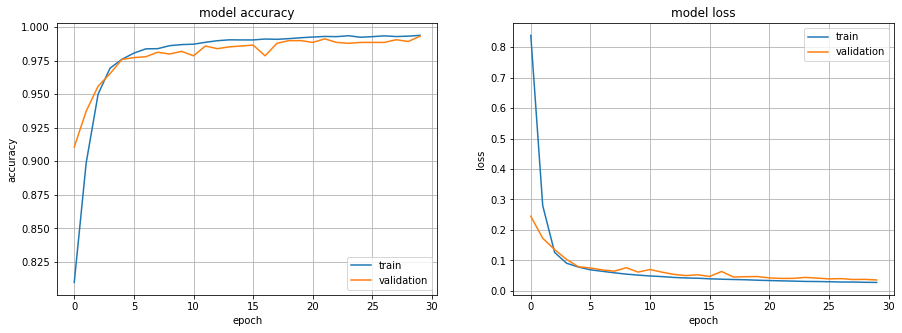

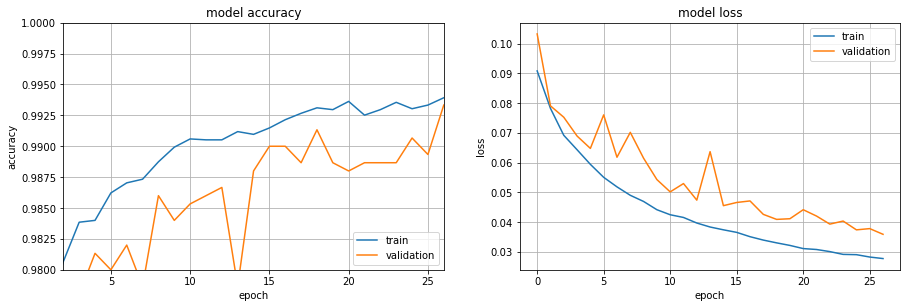

In [184]:
# summarize history for accuracy
plt.figure(1, figsize=(15, 5))
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()

# summarize history for loss
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()
plt.show()

##################################################### Why not to zoom a bit?

plt.figure(1, figsize=(15, 10))
# summarize history for accuracy
plt.subplot(221)
plt.plot(history.history['accuracy'][zoom:])
plt.plot(history.history['val_accuracy'][zoom:])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()
plt.axis([2, 26, 0.98, 1.0])

# summarize history for loss
plt.subplot(222)
plt.plot(history.history['loss'][zoom:])
plt.plot(history.history['val_loss'][zoom:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()


plt.show()

### Now we add one layer more

In [188]:
model_4 = tf.keras.Sequential(
  [
      tf.keras.layers.Flatten(input_shape=(image_size, image_size)),
      tf.keras.layers.Dense(200, activation='sigmoid'),
      tf.keras.layers.Dense(60, activation='sigmoid'),
      tf.keras.layers.Dense(num_classes, activation='softmax')
  ])

model_4.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# print model layers
model_4.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 10000)             0         
                                                                 
 dense_11 (Dense)            (None, 200)               2000200   
                                                                 
 dense_12 (Dense)            (None, 60)                12060     
                                                                 
 dense_13 (Dense)            (None, 2)                 122       
                                                                 
Total params: 2,012,382
Trainable params: 2,012,382
Non-trainable params: 0
_________________________________________________________________


In [189]:
BATCH_SIZE = 128
epochs = 30

model_4.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model_4.fit(x_train, y_train, 
                    batch_size=BATCH_SIZE,
                    epochs=epochs,
                    validation_split=0.1)

Epoch 1/30
106/106 [==============================] - 1s 11ms/step - loss: 0.5553 - accuracy: 0.8199 - val_loss: 0.3540 - val_accuracy: 0.9507
Epoch 2/30
106/106 [==============================] - 1s 10ms/step - loss: 0.2146 - accuracy: 0.9693 - val_loss: 0.1175 - val_accuracy: 0.9813
Epoch 3/30
106/106 [==============================] - 1s 11ms/step - loss: 0.0834 - accuracy: 0.9856 - val_loss: 0.1073 - val_accuracy: 0.9700
Epoch 4/30
106/106 [==============================] - 1s 11ms/step - loss: 0.0485 - accuracy: 0.9903 - val_loss: 0.0408 - val_accuracy: 0.9907
Epoch 5/30
106/106 [==============================] - 1s 11ms/step - loss: 0.0328 - accuracy: 0.9924 - val_loss: 0.0316 - val_accuracy: 0.9933
Epoch 6/30
106/106 [==============================] - 1s 11ms/step - loss: 0.0296 - accuracy: 0.9923 - val_loss: 0.0546 - val_accuracy: 0.9833
Epoch 7/30
106/106 [==============================] - 1s 12ms/step - loss: 0.0259 - accuracy: 0.9927 - val_loss: 0.0253 - val_accuracy: 0.9947

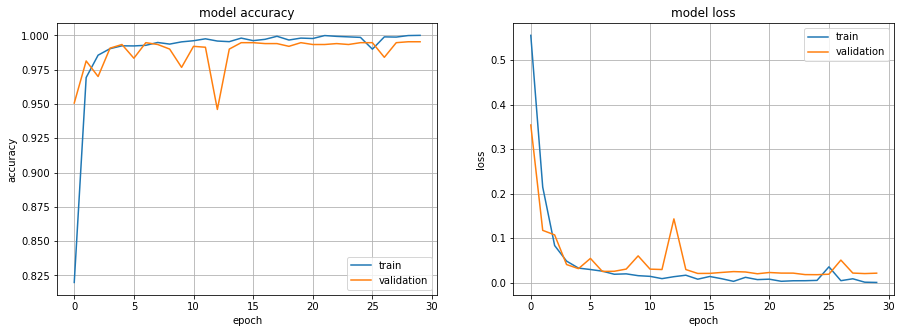

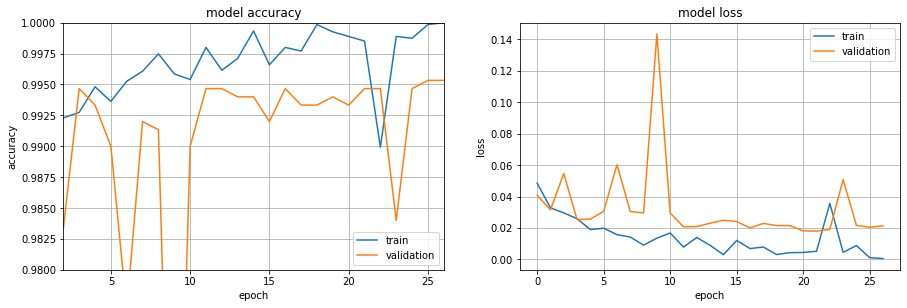

In [190]:
# summarize history for accuracy
plt.figure(1, figsize=(15, 5))
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()

# summarize history for loss
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()
plt.show()

##################################################### Why not to zoom a bit?

plt.figure(1, figsize=(15, 10))
# summarize history for accuracy
plt.subplot(221)
plt.plot(history.history['accuracy'][zoom:])
plt.plot(history.history['val_accuracy'][zoom:])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()
plt.axis([2, 26, 0.98, 1.0])

# summarize history for loss
plt.subplot(222)
plt.plot(history.history['loss'][zoom:])
plt.plot(history.history['val_loss'][zoom:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()


plt.show()

### Now again with sgd, but with the layer more

In [191]:
model_5 = tf.keras.Sequential(
  [
      tf.keras.layers.Flatten(input_shape=(image_size, image_size)),
      tf.keras.layers.Dense(200, activation='relu'),
      tf.keras.layers.Dense(60, activation='relu'),
      tf.keras.layers.Dense(num_classes, activation='softmax')
  ])

model_5.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# print model layers
model_5.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 10000)             0         
                                                                 
 dense_14 (Dense)            (None, 200)               2000200   
                                                                 
 dense_15 (Dense)            (None, 60)                12060     
                                                                 
 dense_16 (Dense)            (None, 2)                 122       
                                                                 
Total params: 2,012,382
Trainable params: 2,012,382
Non-trainable params: 0
_________________________________________________________________


In [192]:
BATCH_SIZE = 128
epochs = 30

model_5.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model_5.fit(x_train, y_train, 
                    batch_size=BATCH_SIZE,
                    epochs=epochs,
                    validation_split=0.1)

Epoch 1/30
106/106 [==============================] - 2s 13ms/step - loss: 0.4941 - accuracy: 0.8518 - val_loss: 0.1839 - val_accuracy: 0.9340
Epoch 2/30
106/106 [==============================] - 1s 12ms/step - loss: 0.1132 - accuracy: 0.9600 - val_loss: 0.0758 - val_accuracy: 0.9753
Epoch 3/30
106/106 [==============================] - 1s 12ms/step - loss: 0.0616 - accuracy: 0.9818 - val_loss: 0.0494 - val_accuracy: 0.9887
Epoch 4/30
106/106 [==============================] - 1s 13ms/step - loss: 0.0391 - accuracy: 0.9896 - val_loss: 0.0386 - val_accuracy: 0.9900
Epoch 5/30
106/106 [==============================] - 1s 12ms/step - loss: 0.0425 - accuracy: 0.9859 - val_loss: 0.0561 - val_accuracy: 0.9800
Epoch 6/30
106/106 [==============================] - 1s 13ms/step - loss: 0.0257 - accuracy: 0.9919 - val_loss: 0.0311 - val_accuracy: 0.9900
Epoch 7/30
106/106 [==============================] - 1s 13ms/step - loss: 0.0194 - accuracy: 0.9942 - val_loss: 0.0427 - val_accuracy: 0.9853

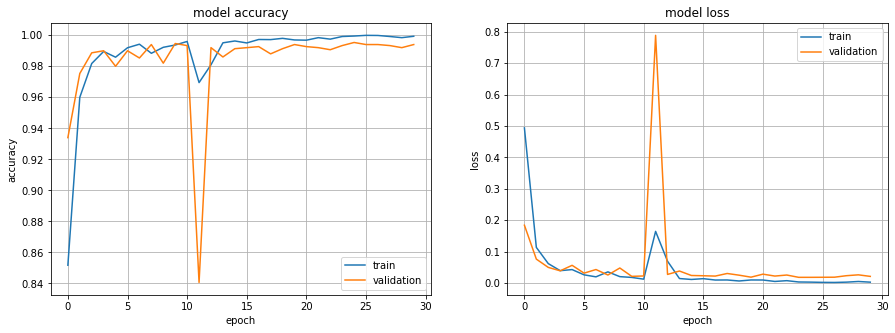

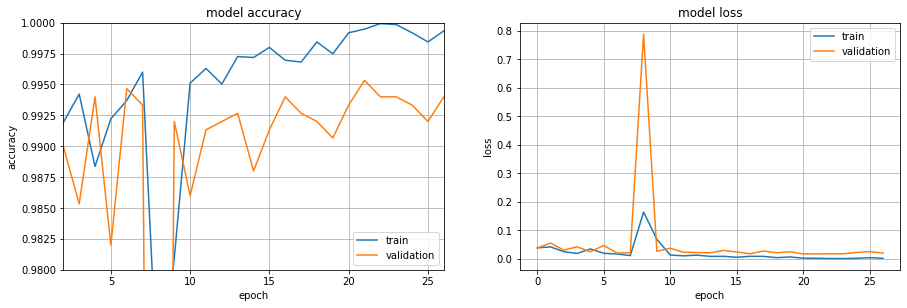

In [193]:
# summarize history for accuracy
plt.figure(1, figsize=(15, 5))
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()

# summarize history for loss
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()
plt.show()

##################################################### Why not to zoom a bit?

plt.figure(1, figsize=(15, 10))
# summarize history for accuracy
plt.subplot(221)
plt.plot(history.history['accuracy'][zoom:])
plt.plot(history.history['val_accuracy'][zoom:])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()
plt.axis([2, 26, 0.98, 1.0])

# summarize history for loss
plt.subplot(222)
plt.plot(history.history['loss'][zoom:])
plt.plot(history.history['val_loss'][zoom:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()


plt.show()

### Now we specify another learning rate

In [194]:
model_6 = tf.keras.Sequential(
  [
      tf.keras.layers.Flatten(input_shape=(image_size, image_size)),
      tf.keras.layers.Dense(200, activation='relu'),
      tf.keras.layers.Dense(100, activation='relu'),
      tf.keras.layers.Dense(60, activation='relu'),
      tf.keras.layers.Dense(num_classes, activation='softmax')
  ])

model_6.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# print model layers
model_6.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 10000)             0         
                                                                 
 dense_17 (Dense)            (None, 200)               2000200   
                                                                 
 dense_18 (Dense)            (None, 100)               20100     
                                                                 
 dense_19 (Dense)            (None, 60)                6060      
                                                                 
 dense_20 (Dense)            (None, 2)                 122       
                                                                 
Total params: 2,026,482
Trainable params: 2,026,482
Non-trainable params: 0
_________________________________________________________________


In [195]:
BATCH_SIZE = 128
epochs = 30

model_6.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model_6.fit(x_train, y_train, 
                    batch_size=BATCH_SIZE,
                    epochs=epochs,
                    validation_split=0.1)

Epoch 1/30
106/106 [==============================] - 2s 13ms/step - loss: 0.2376 - accuracy: 0.9023 - val_loss: 0.1040 - val_accuracy: 0.9647
Epoch 2/30
106/106 [==============================] - 1s 13ms/step - loss: 0.0849 - accuracy: 0.9688 - val_loss: 0.0770 - val_accuracy: 0.9687
Epoch 3/30
106/106 [==============================] - 1s 13ms/step - loss: 0.0438 - accuracy: 0.9847 - val_loss: 0.0458 - val_accuracy: 0.9867
Epoch 4/30
106/106 [==============================] - 1s 14ms/step - loss: 0.0540 - accuracy: 0.9819 - val_loss: 0.4384 - val_accuracy: 0.8727
Epoch 5/30
106/106 [==============================] - 2s 15ms/step - loss: 0.1179 - accuracy: 0.9613 - val_loss: 0.0389 - val_accuracy: 0.9880
Epoch 6/30
106/106 [==============================] - 1s 14ms/step - loss: 0.0248 - accuracy: 0.9910 - val_loss: 0.0296 - val_accuracy: 0.9907
Epoch 7/30
106/106 [==============================] - 1s 14ms/step - loss: 0.0254 - accuracy: 0.9915 - val_loss: 0.0281 - val_accuracy: 0.9893

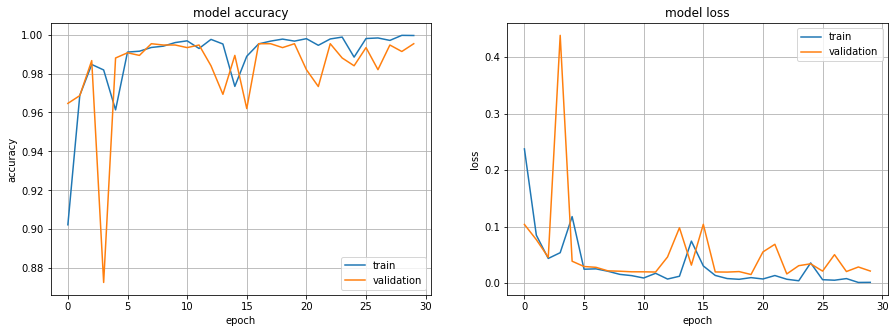

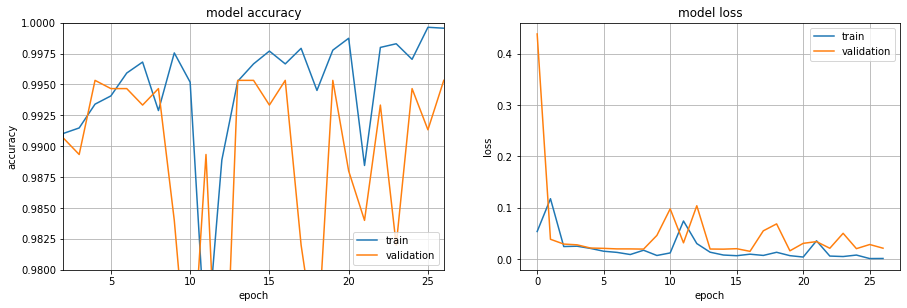

In [196]:
# summarize history for accuracy
plt.figure(1, figsize=(15, 5))
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()

# summarize history for loss
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()
plt.show()

##################################################### Why not to zoom a bit?

plt.figure(1, figsize=(15, 10))
# summarize history for accuracy
plt.subplot(221)
plt.plot(history.history['accuracy'][zoom:])
plt.plot(history.history['val_accuracy'][zoom:])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()
plt.axis([2, 26, 0.98, 1.0])

# summarize history for loss
plt.subplot(222)
plt.plot(history.history['loss'][zoom:])
plt.plot(history.history['val_loss'][zoom:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()


plt.show()

### Now we use the Dropout

In [197]:
model_7 = tf.keras.Sequential(
  [
      tf.keras.layers.Flatten(input_shape=(image_size, image_size)),
      tf.keras.layers.Dense(200, activation='relu'),
      tf.keras.layers.Dropout(0.15),
      tf.keras.layers.Dense(100, activation='relu'),
      tf.keras.layers.Dropout(0.15),
      tf.keras.layers.Dense(60, activation='relu'),
      tf.keras.layers.Dropout(0.15),
      tf.keras.layers.Dense(num_classes, activation='softmax')
  ])

model_7.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# print model layers
model_7.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 10000)             0         
                                                                 
 dense_21 (Dense)            (None, 200)               2000200   
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                                 
 dense_22 (Dense)            (None, 100)               20100     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_23 (Dense)            (None, 60)                6060      
                                                                 
 dropout_4 (Dropout)         (None, 60)              

In [198]:
BATCH_SIZE = 128
epochs = 30

model_7.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model_7.fit(x_train, y_train, 
                    batch_size=BATCH_SIZE,
                    epochs=epochs,
                    validation_split=0.1)

Epoch 1/30
106/106 [==============================] - 2s 13ms/step - loss: 0.4161 - accuracy: 0.8421 - val_loss: 0.1698 - val_accuracy: 0.9300
Epoch 2/30
106/106 [==============================] - 1s 13ms/step - loss: 0.1127 - accuracy: 0.9587 - val_loss: 0.0606 - val_accuracy: 0.9813
Epoch 3/30
106/106 [==============================] - 1s 13ms/step - loss: 0.0696 - accuracy: 0.9746 - val_loss: 0.0642 - val_accuracy: 0.9760
Epoch 4/30
106/106 [==============================] - 1s 14ms/step - loss: 0.0562 - accuracy: 0.9804 - val_loss: 0.0348 - val_accuracy: 0.9900
Epoch 5/30
106/106 [==============================] - 2s 15ms/step - loss: 0.0497 - accuracy: 0.9830 - val_loss: 0.0713 - val_accuracy: 0.9747
Epoch 6/30
106/106 [==============================] - 2s 14ms/step - loss: 0.0596 - accuracy: 0.9801 - val_loss: 0.0398 - val_accuracy: 0.9907
Epoch 7/30
106/106 [==============================] - 2s 15ms/step - loss: 0.0421 - accuracy: 0.9859 - val_loss: 0.0421 - val_accuracy: 0.9860

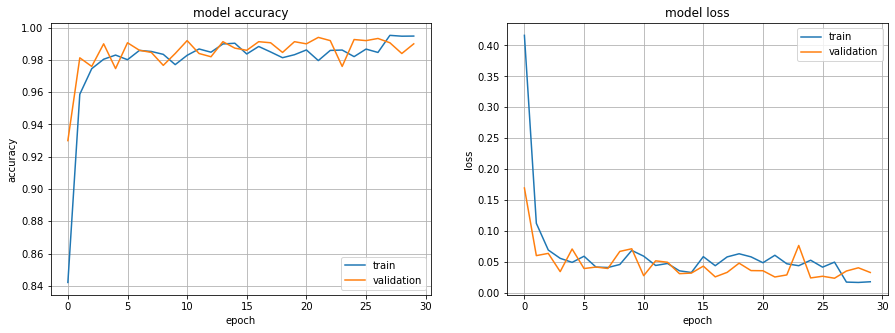

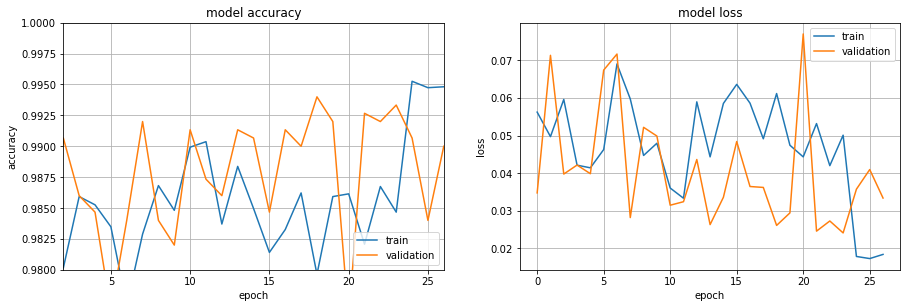

In [199]:
# summarize history for accuracy
plt.figure(1, figsize=(15, 5))
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()

# summarize history for loss
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()
plt.show()

##################################################### Why not to zoom a bit?

plt.figure(1, figsize=(15, 10))
# summarize history for accuracy
plt.subplot(221)
plt.plot(history.history['accuracy'][zoom:])
plt.plot(history.history['val_accuracy'][zoom:])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()
plt.axis([2, 26, 0.98, 1.0])

# summarize history for loss
plt.subplot(222)
plt.plot(history.history['loss'][zoom:])
plt.plot(history.history['val_loss'][zoom:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()


plt.show()

### To use Convolutional neural networks we need one dimension more (3 dims)

In [200]:
# Model / data parameters
num_classes = 2
input_shape = (image_size, image_size, 1)

In [201]:
y_train.shape, y_test.shape

((15000, 2), (5000, 2))

In [202]:
x_train.shape, x_test.shape

((15000, 100, 100), (5000, 100, 100))

In [203]:
# Make sure images have shape (100, 100, 1) -----> Tensors needed for batches
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [204]:
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("\n")
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (15000, 100, 100, 1)
x_test shape: (5000, 100, 100, 1)


15000 train samples
5000 test samples


In [205]:
model_8 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model_8.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model_8.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 flatten_13 (Flatten)        (None, 33856)             0         
                                                                 
 dropout_5 (Dropout)         (None, 33856)           

In [207]:
BATCH_SIZE = 128
epochs = 3

model_8.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model_8.fit(x_train, y_train, 
                      batch_size=BATCH_SIZE,
                      epochs=epochs,
                      validation_split=0.1)

Epoch 1/3
106/106 [==============================] - 76s 711ms/step - loss: 0.0129 - accuracy: 0.9960 - val_loss: 0.0063 - val_accuracy: 0.9980
Epoch 2/3
106/106 [==============================] - 77s 730ms/step - loss: 0.0035 - accuracy: 0.9993 - val_loss: 0.0176 - val_accuracy: 0.9947
Epoch 3/3
106/106 [==============================] - 83s 780ms/step - loss: 0.0024 - accuracy: 0.9992 - val_loss: 8.3841e-04 - val_accuracy: 1.0000


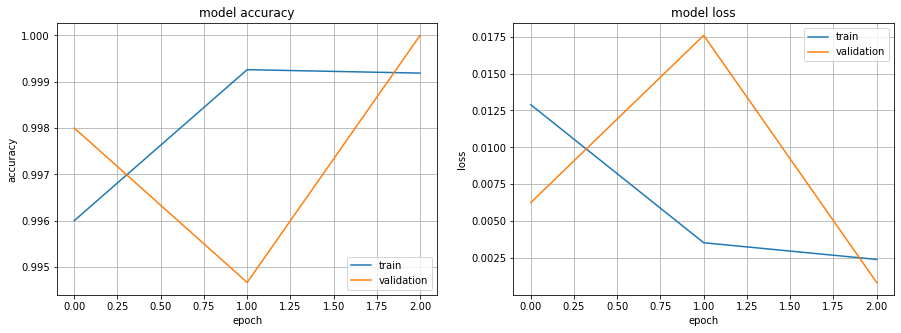

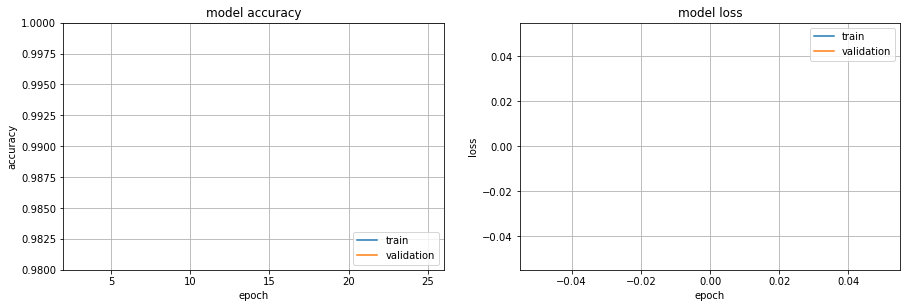

In [208]:
# summarize history for accuracy
plt.figure(1, figsize=(15, 5))
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()

# summarize history for loss
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()
plt.show()

##################################################### Why not to zoom a bit?

plt.figure(1, figsize=(15, 10))
# summarize history for accuracy
plt.subplot(221)
plt.plot(history.history['accuracy'][zoom:])
plt.plot(history.history['val_accuracy'][zoom:])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()
plt.axis([2, 26, 0.98, 1.0])

# summarize history for loss
plt.subplot(222)
plt.plot(history.history['loss'][zoom:])
plt.plot(history.history['val_loss'][zoom:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()


plt.show()

In [209]:
score = model_8.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.0024928513448685408
Test accuracy: 0.9994000196456909


In [210]:
predictions = model_8.predict(x_test)

In [211]:
y_hat = np.argmax(predictions, axis=1)

In [212]:
y_hat

array([0, 0, 1, ..., 1, 0, 0])

In [213]:
target = np.argmax(y_test, axis=1)
target

array([0, 0, 1, ..., 1, 0, 0])

In [214]:
mistakes = []

for i in range(len(target)):
    if y_hat[i] != target[i]:
        mistakes.append(i)

mistakes

[1214, 1442, 4929]

In [215]:
len(mistakes)

3

In [216]:
len(target)

5000

In [217]:
1 - (len(mistakes) / len(target))

0.9994

In [218]:
np.resize(x_test[mistakes[1]], (image_size, image_size))

array([[0.31764707, 0.3137255 , 0.31764707, ..., 0.36078432, 0.34901962,
        0.3372549 ],
       [0.31764707, 0.32156864, 0.3254902 , ..., 0.3764706 , 0.34509805,
        0.32941177],
       [0.3254902 , 0.32941177, 0.3372549 , ..., 0.27058825, 0.24705882,
        0.20784314],
       ...,
       [0.3137255 , 0.31764707, 0.3137255 , ..., 0.3254902 , 0.32941177,
        0.3137255 ],
       [0.30980393, 0.30980393, 0.30980393, ..., 0.31764707, 0.32941177,
        0.30588236],
       [0.3019608 , 0.30588236, 0.3019608 , ..., 0.3137255 , 0.3137255 ,
        0.29803923]], dtype=float32)

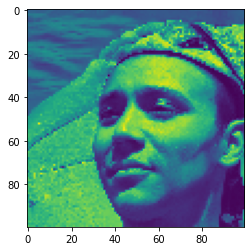

In [219]:
plt.imshow(np.resize(x_test[mistakes[2]], (image_size, image_size)))

In [220]:
target[mistakes[2]]

1

In [221]:
y_hat[mistakes[2]]

0

## Let's see which one are wrongly classified

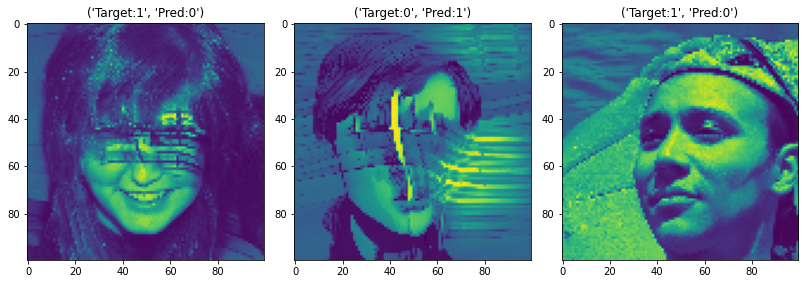

In [227]:
rows = 1
cols = len(mistakes)+1
axes = []
fig = plt.figure(figsize=(15,8))

for a in range(len(mistakes)):
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title=("Target:"+str(target[mistakes[a]]), "Pred:"+str(y_hat[mistakes[a]]))
    axes[-1].set_title(subplot_title)  
    plt.imshow(np.resize(x_test[mistakes[a]], (image_size, image_size)))
fig.tight_layout()    
plt.show()